In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, kruskal, chi2_contingency
import warnings
warnings.filterwarnings('ignore')

In [57]:
data = pd.read_csv('housing.csv')
data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

Target = median_house_value

?? ocean_proximity ?? 

In [58]:
data.shape

(20640, 10)

In [59]:
data.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [60]:
data.dtypes.value_counts()

float64    9
object     1
dtype: int64

<AxesSubplot:>

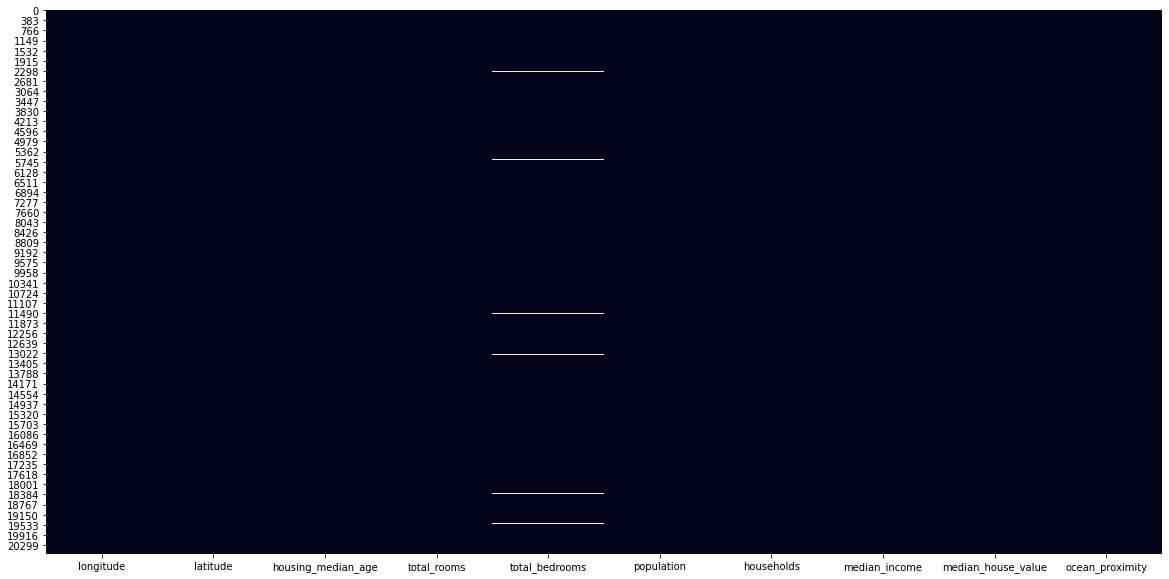

In [61]:
plt.figure(figsize=(20,10))
sns.heatmap(data.isna(), cbar=False)

In [62]:
(data.isna().sum() / data.shape[0]).sort_values(ascending=True)

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
total_bedrooms        0.010029
dtype: float64

In [63]:
data['median_house_value'].mean()

206855.81690891474

In [64]:
data['median_house_value'].min()

14999.0

In [65]:
data['median_house_value'].max()

500001.0

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

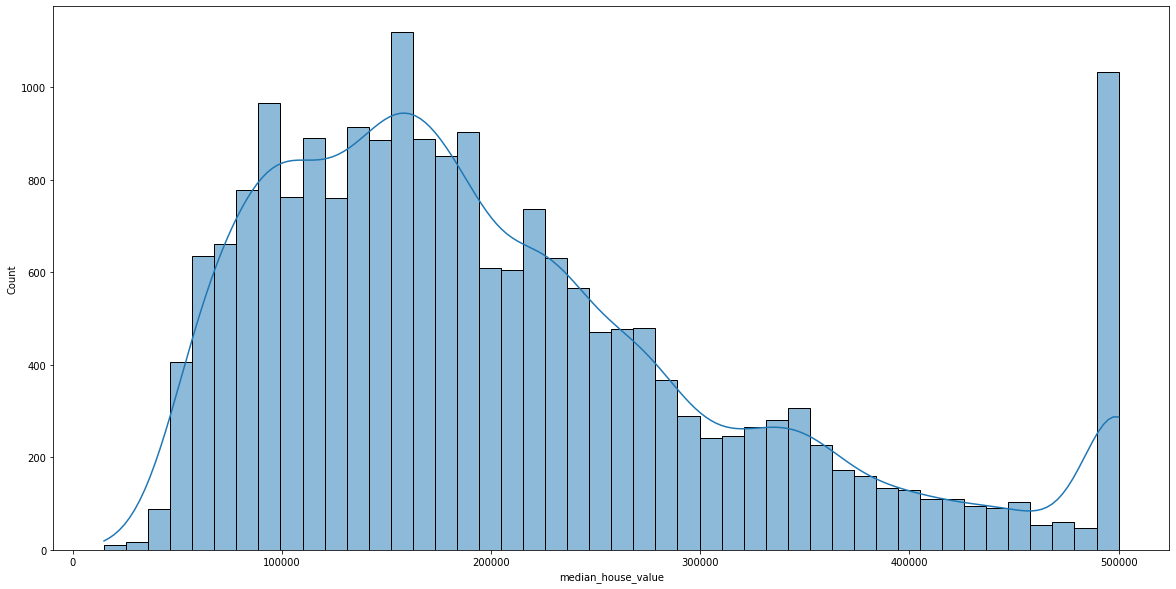

In [66]:
plt.figure(figsize=(20,10))
sns.histplot(data=data['median_house_value'], fill=True, kde=True)

In [67]:
data.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [68]:
coord = ['longitude', 'latitude']
rooms = ['total_rooms', 'total_bedrooms']
neighborhood = ['households', 'population', 'median_income']

In [69]:
df = data.copy()

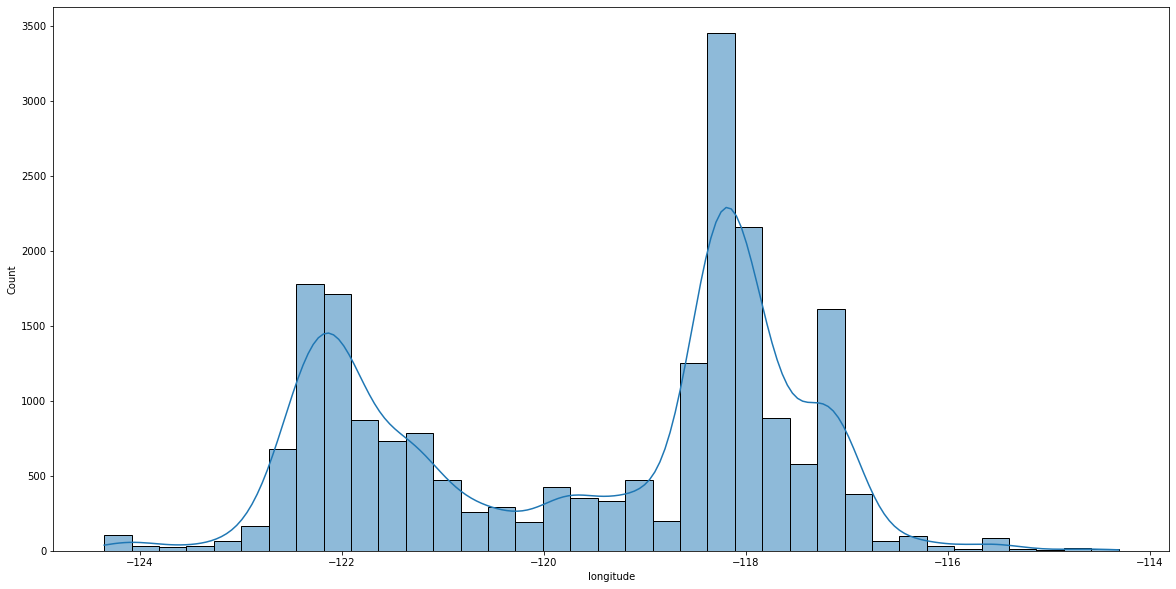

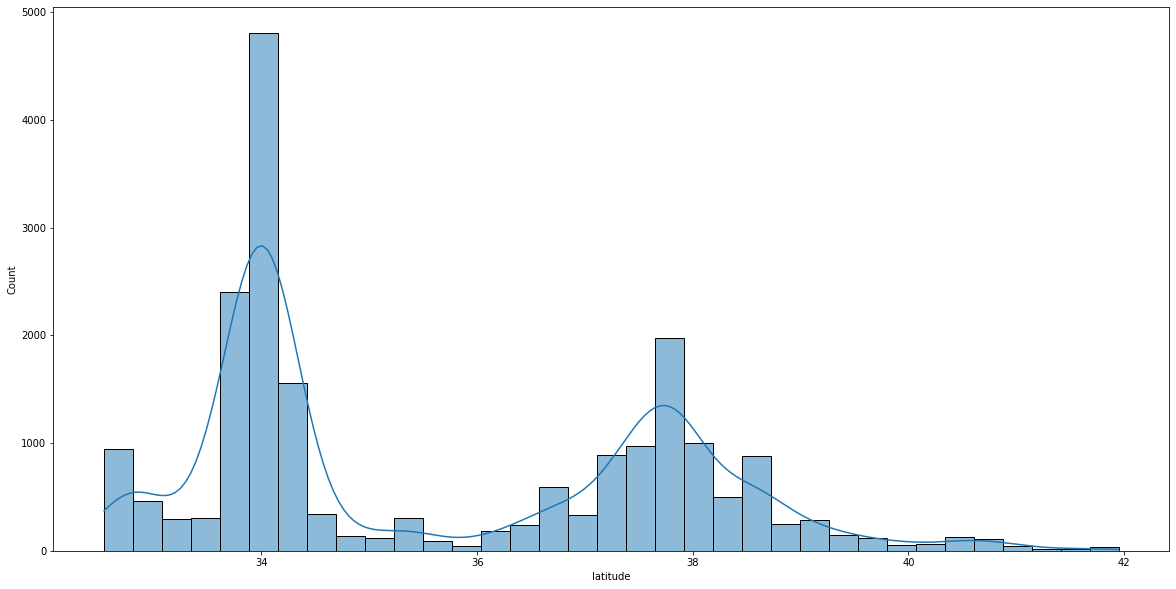

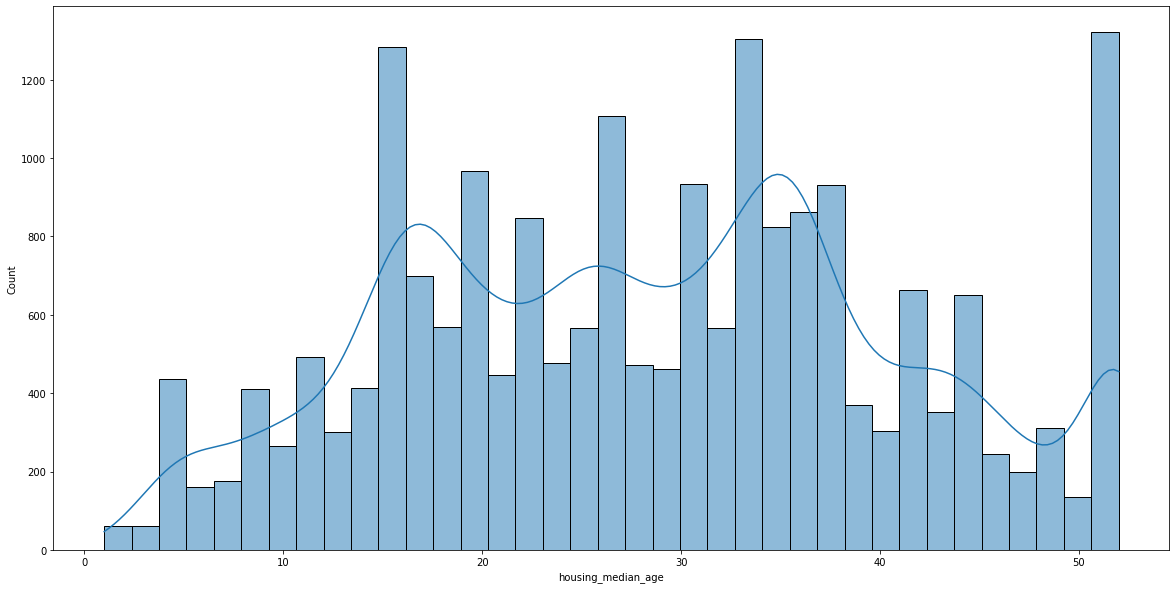

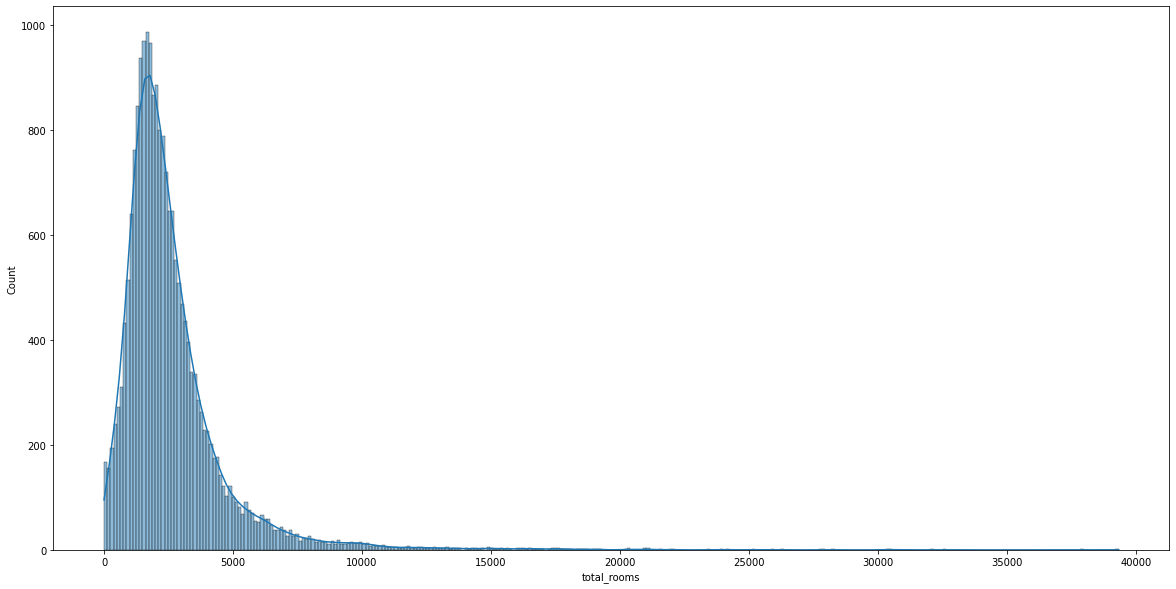

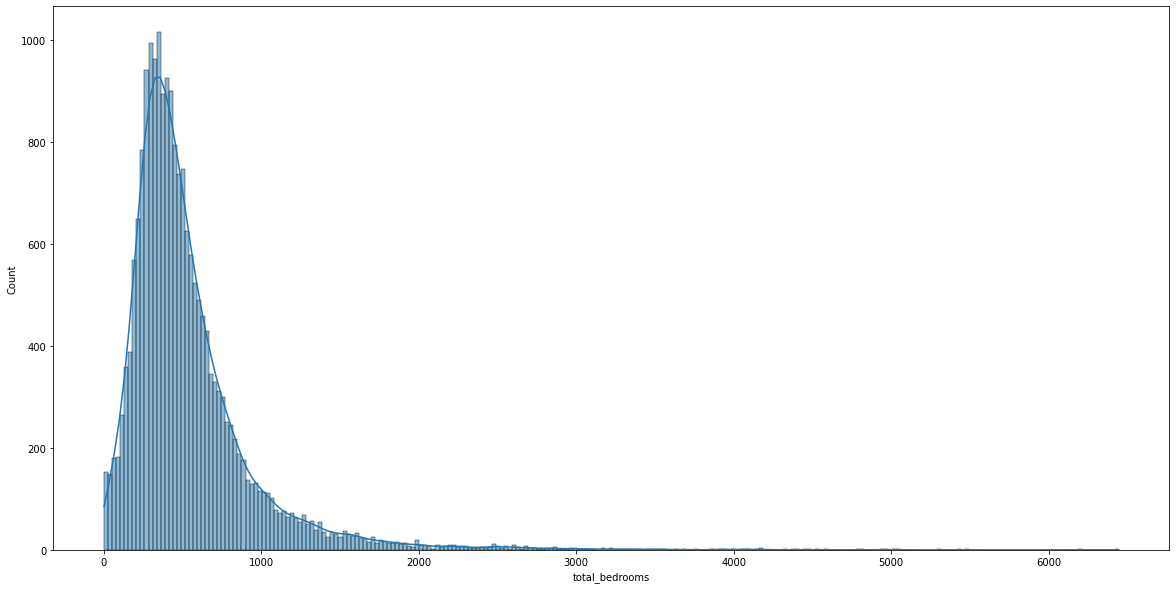

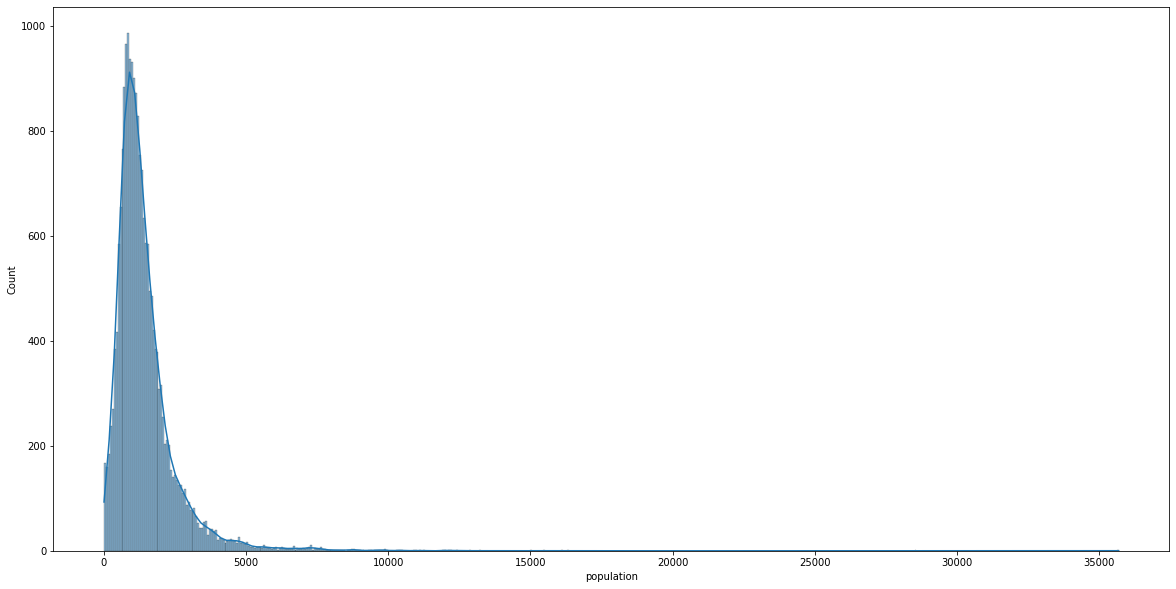

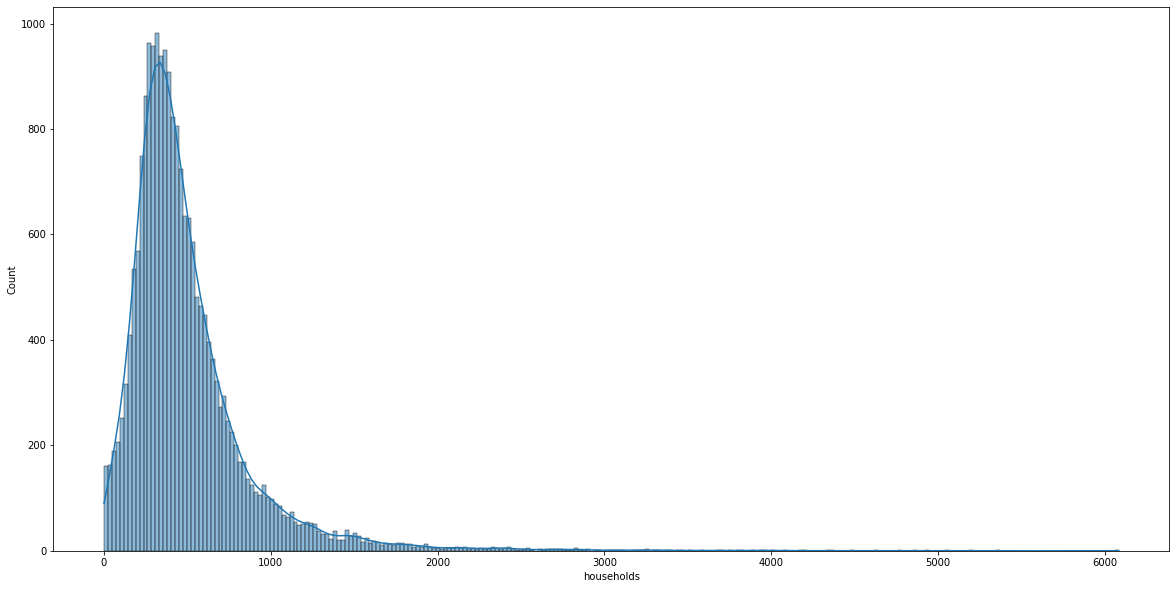

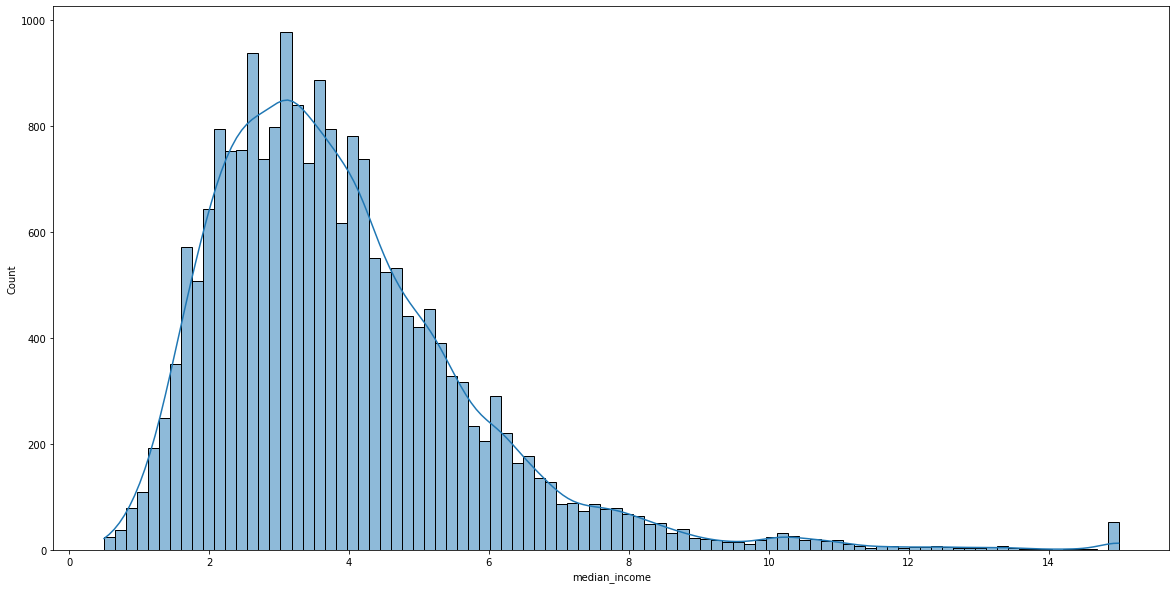

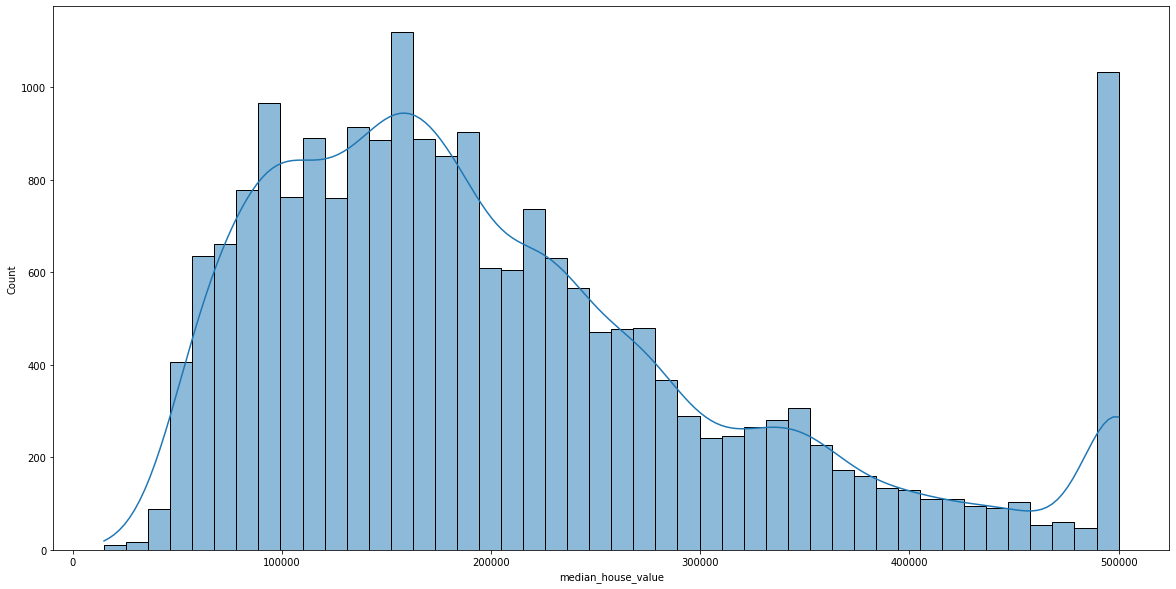

In [70]:
for col in df.select_dtypes('number'):
    plt.figure(figsize=(20,10))
    sns.histplot(data=df[col], fill=True, kde=True)

In [71]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

<AxesSubplot:ylabel='ocean_proximity'>

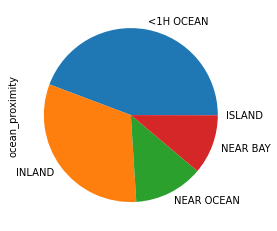

In [72]:
plt.figure()
df['ocean_proximity'].value_counts().plot.pie()

In [73]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [74]:
df_nb = df[df['ocean_proximity'] == 'NEAR BAY']
df_1h = df[df['ocean_proximity'] == '<1H OCEAN']
df_no = df[df['ocean_proximity'] == 'NEAR OCEAN']
df_in = df[df['ocean_proximity'] == 'INLAND']
df_il = df[df['ocean_proximity'] == 'ISLAND']

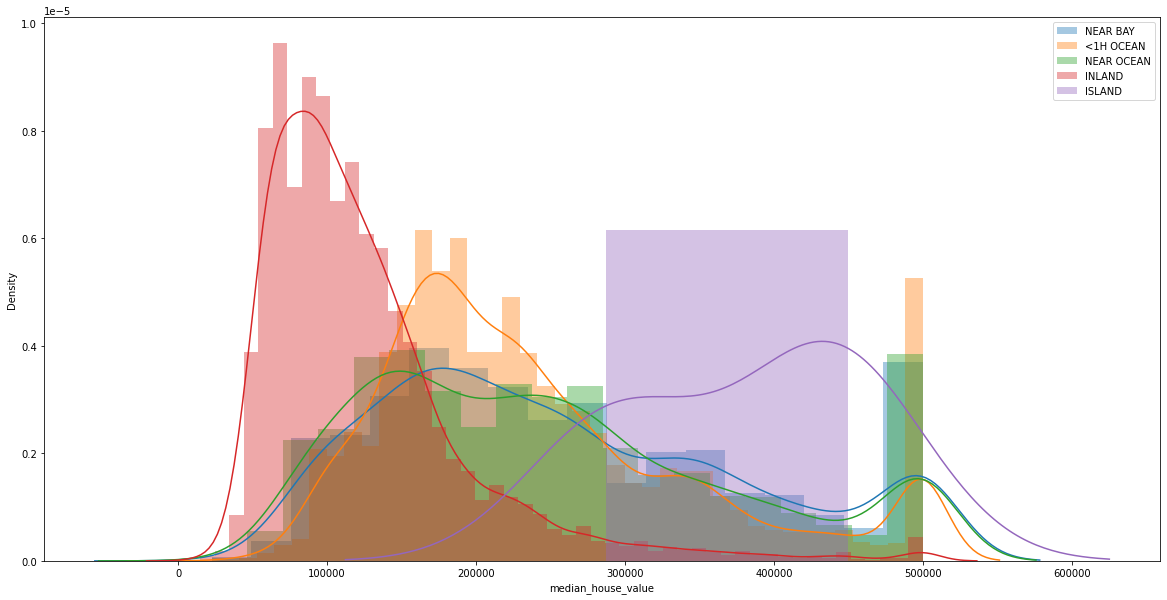

In [75]:
plt.figure(figsize=(20,10))

sns.distplot(df_nb['median_house_value'], label='NEAR BAY')
sns.distplot(df_1h['median_house_value'], label='<1H OCEAN')
sns.distplot(df_no['median_house_value'], label='NEAR OCEAN')
sns.distplot(df_in['median_house_value'], label='INLAND')
sns.distplot(df_il['median_house_value'], label='ISLAND')
plt.legend()

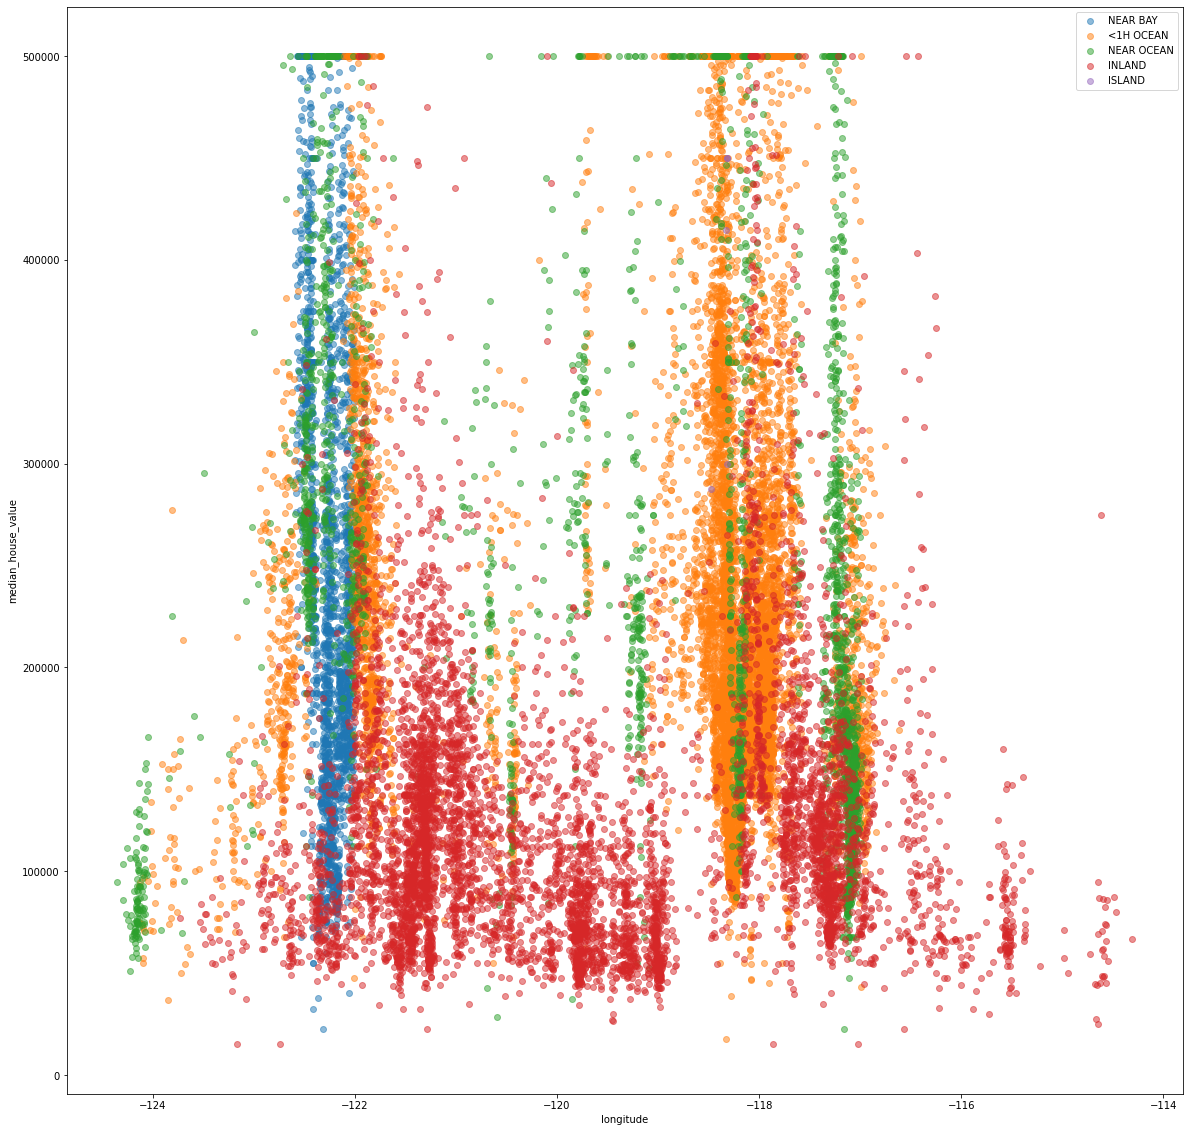

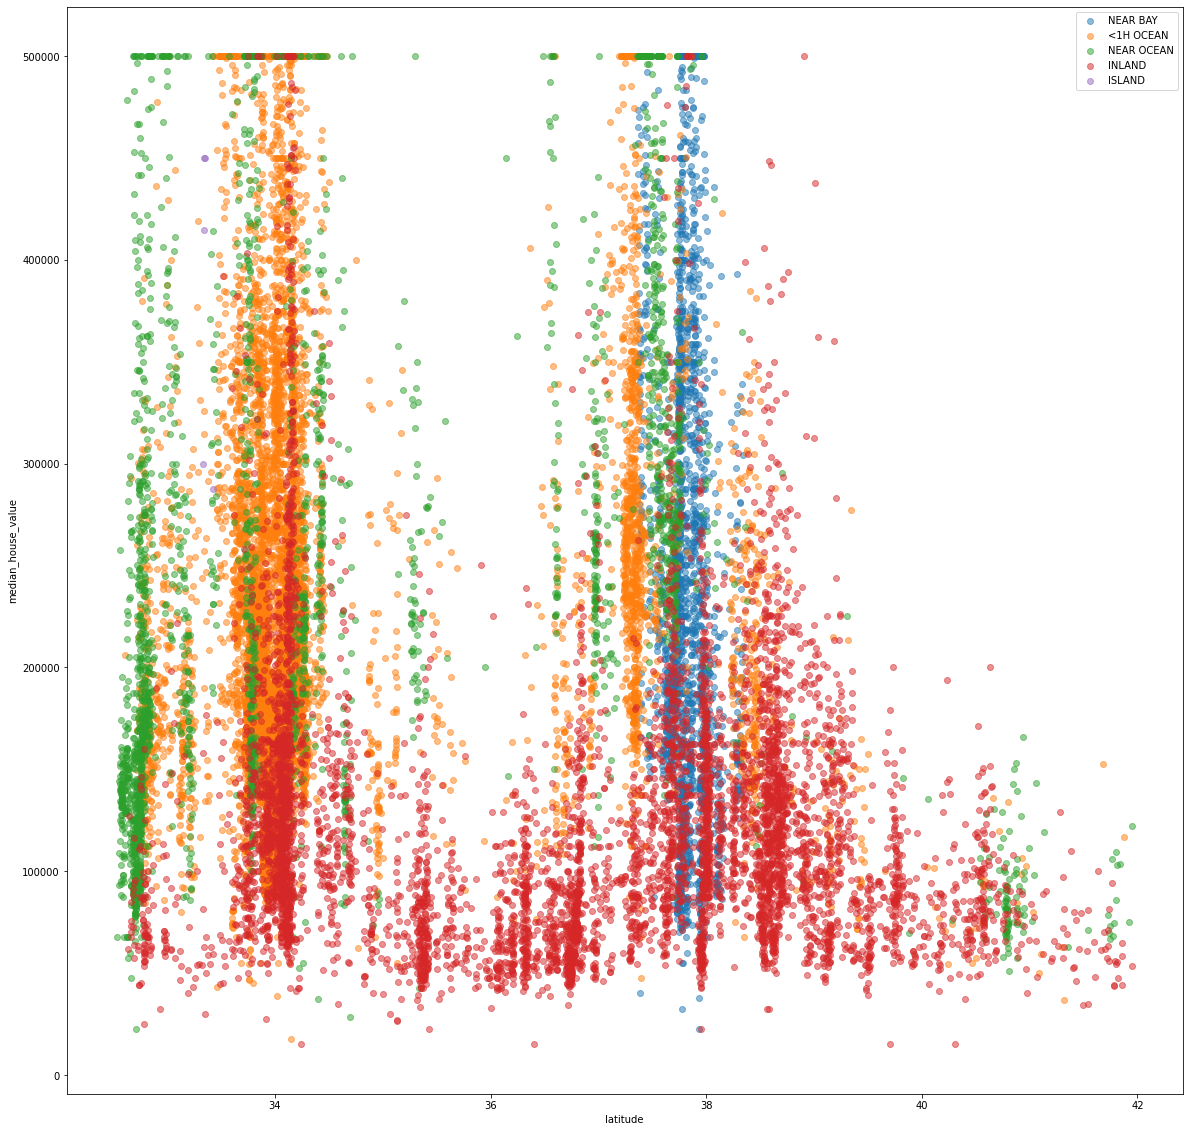

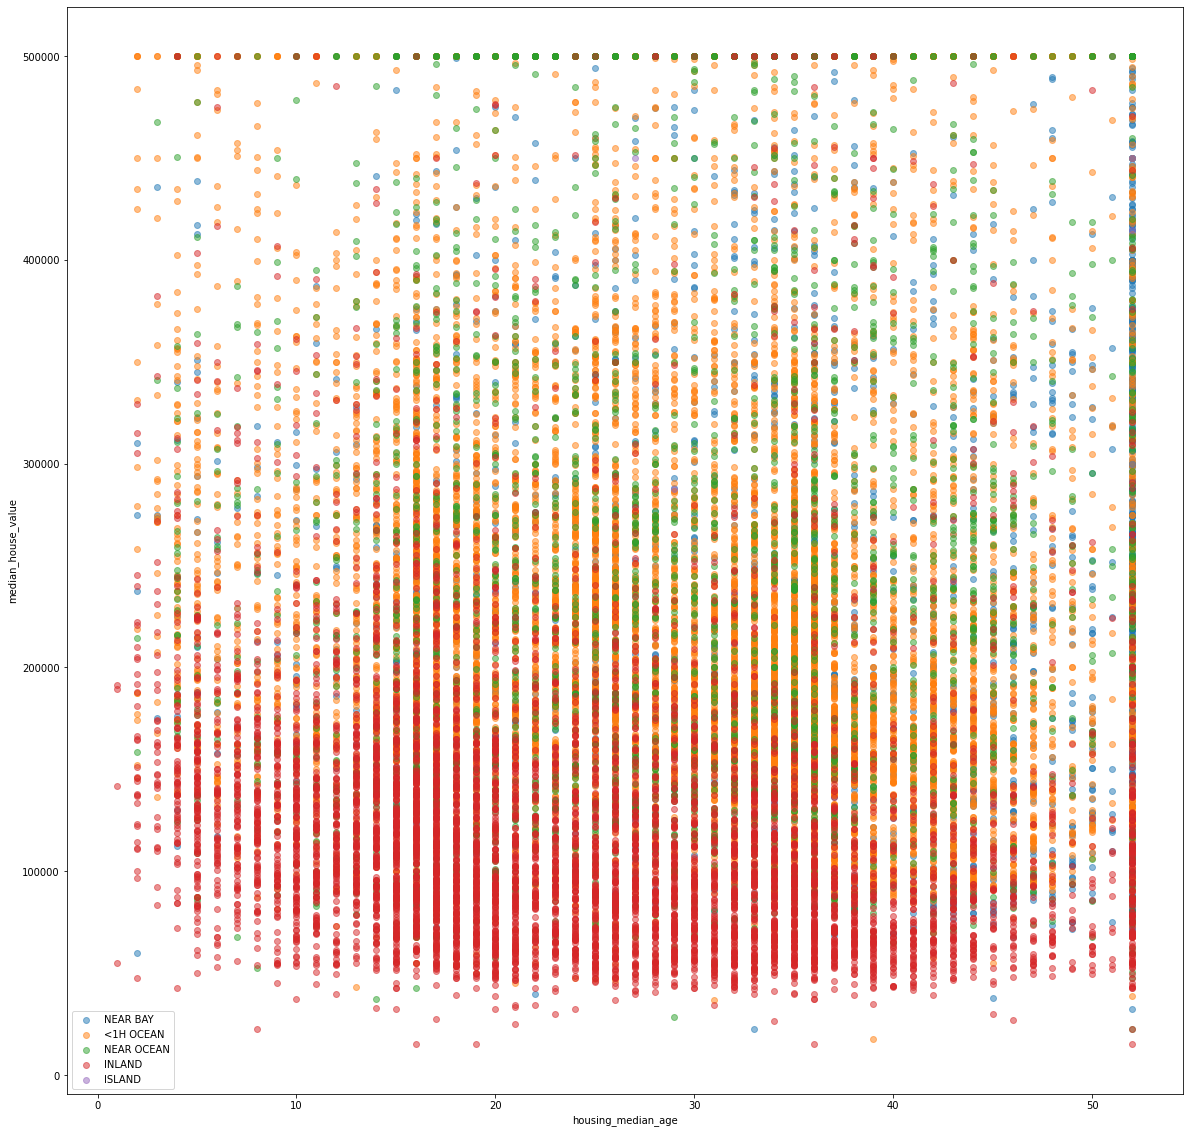

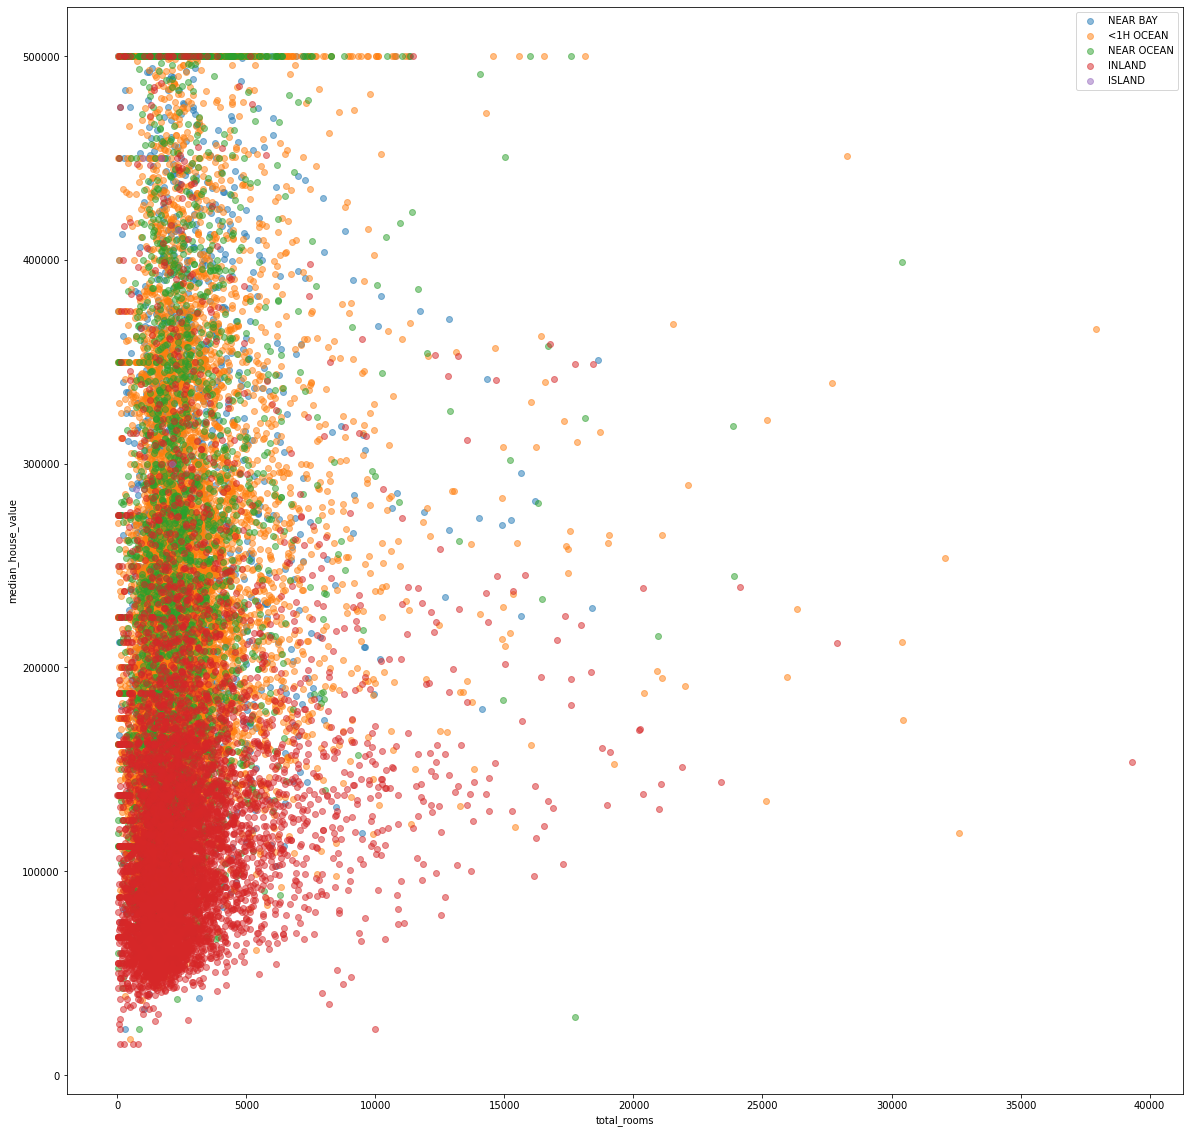

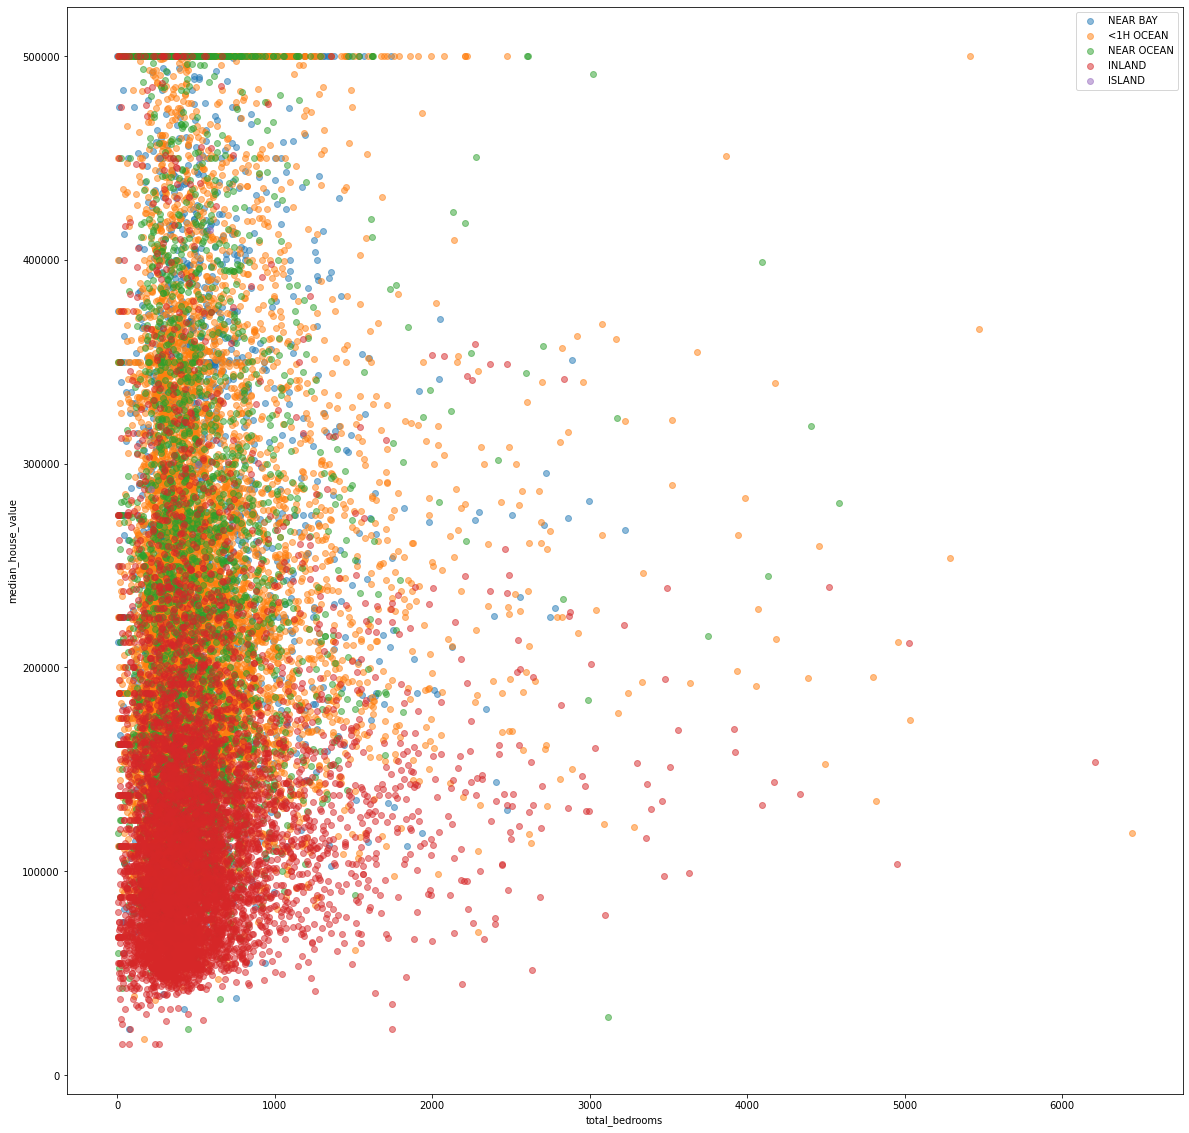

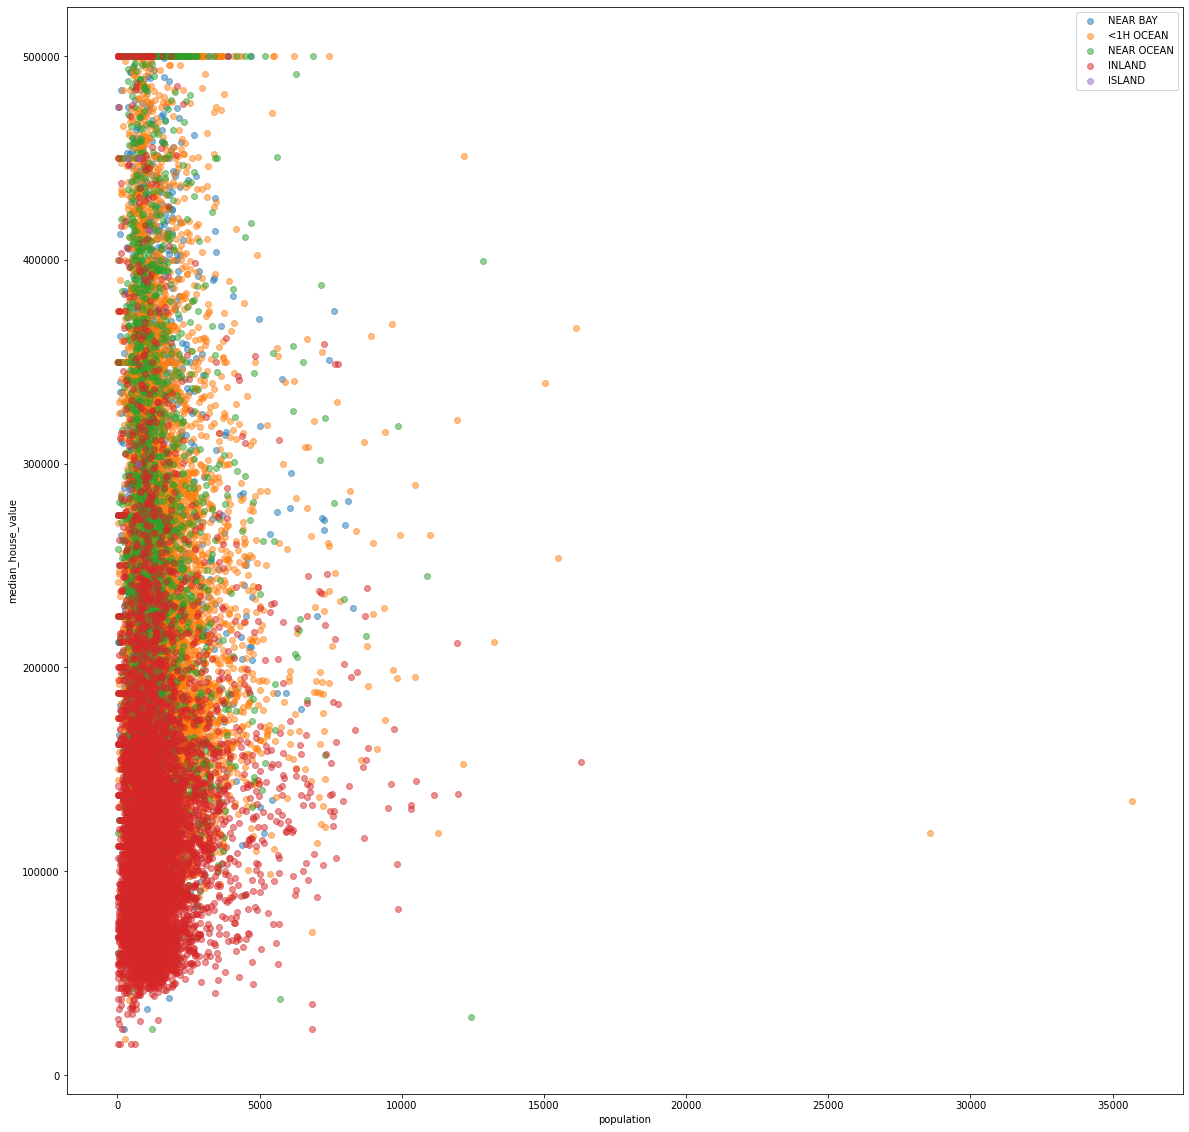

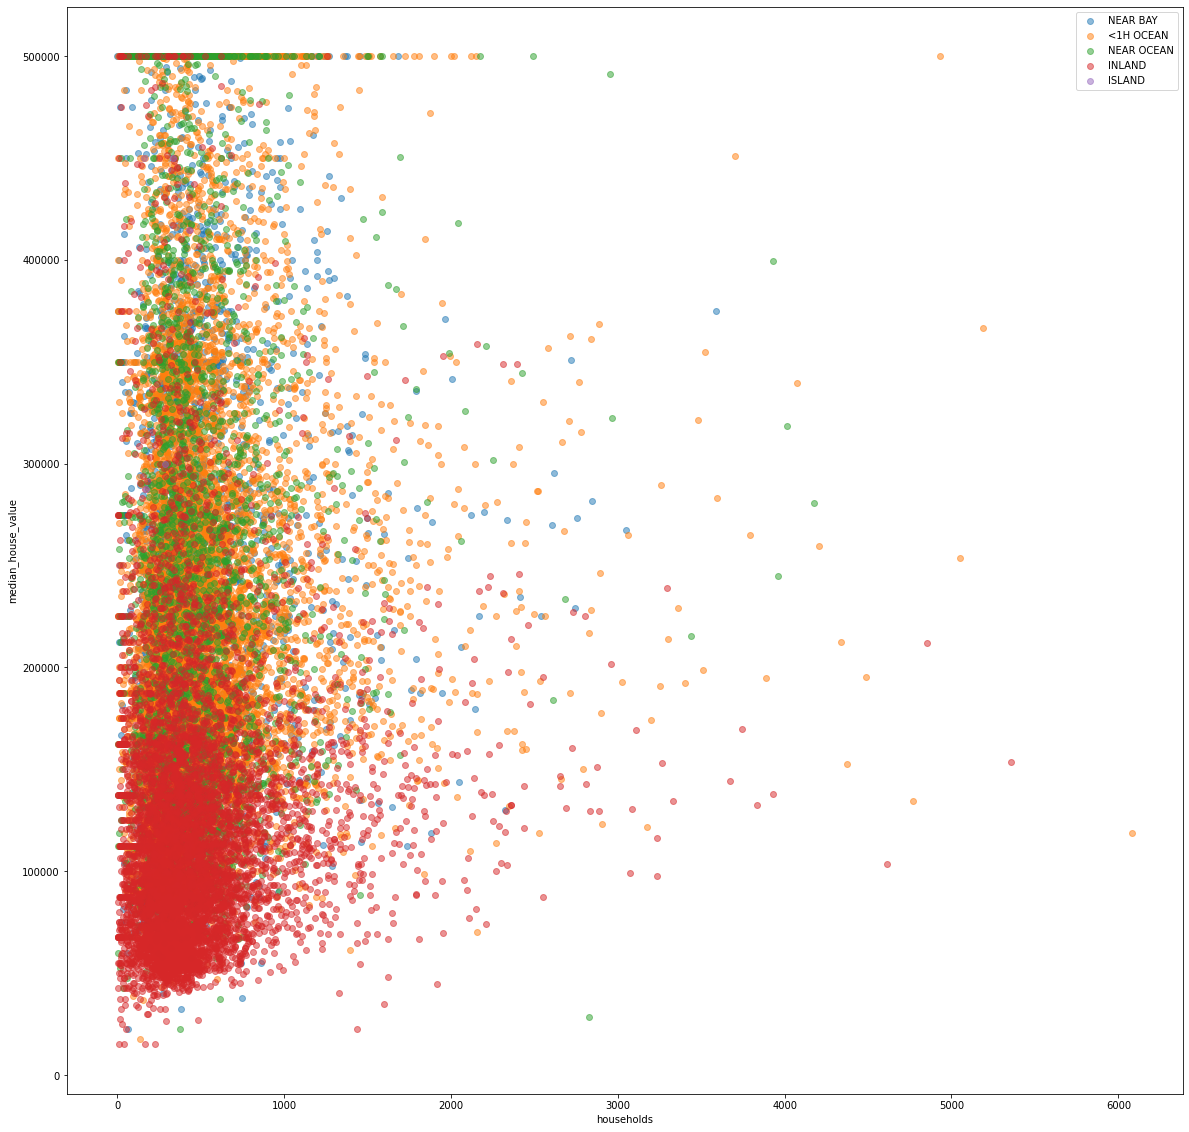

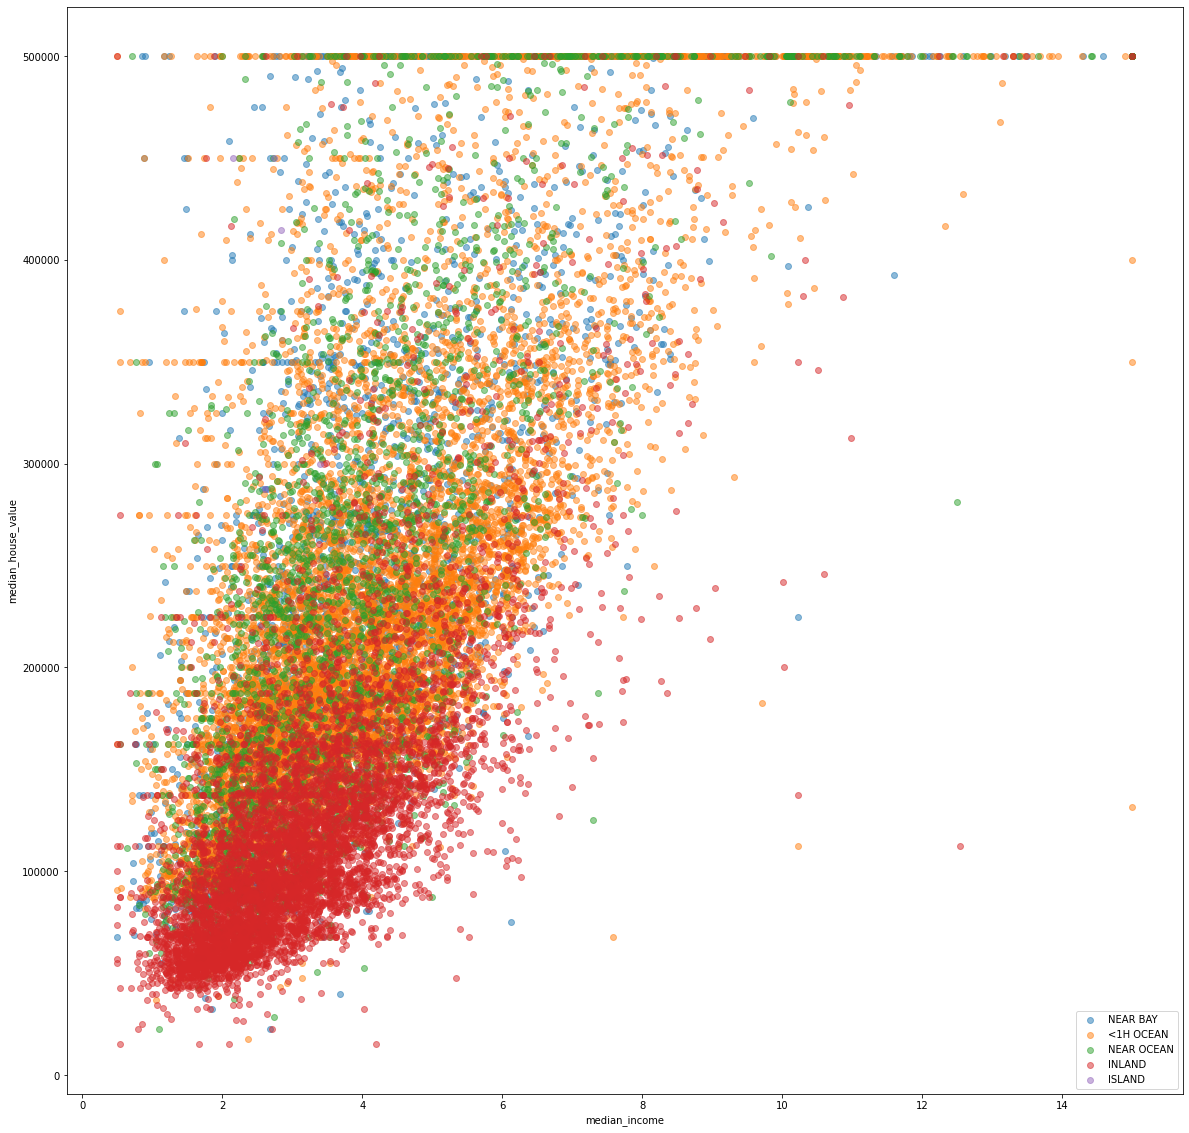

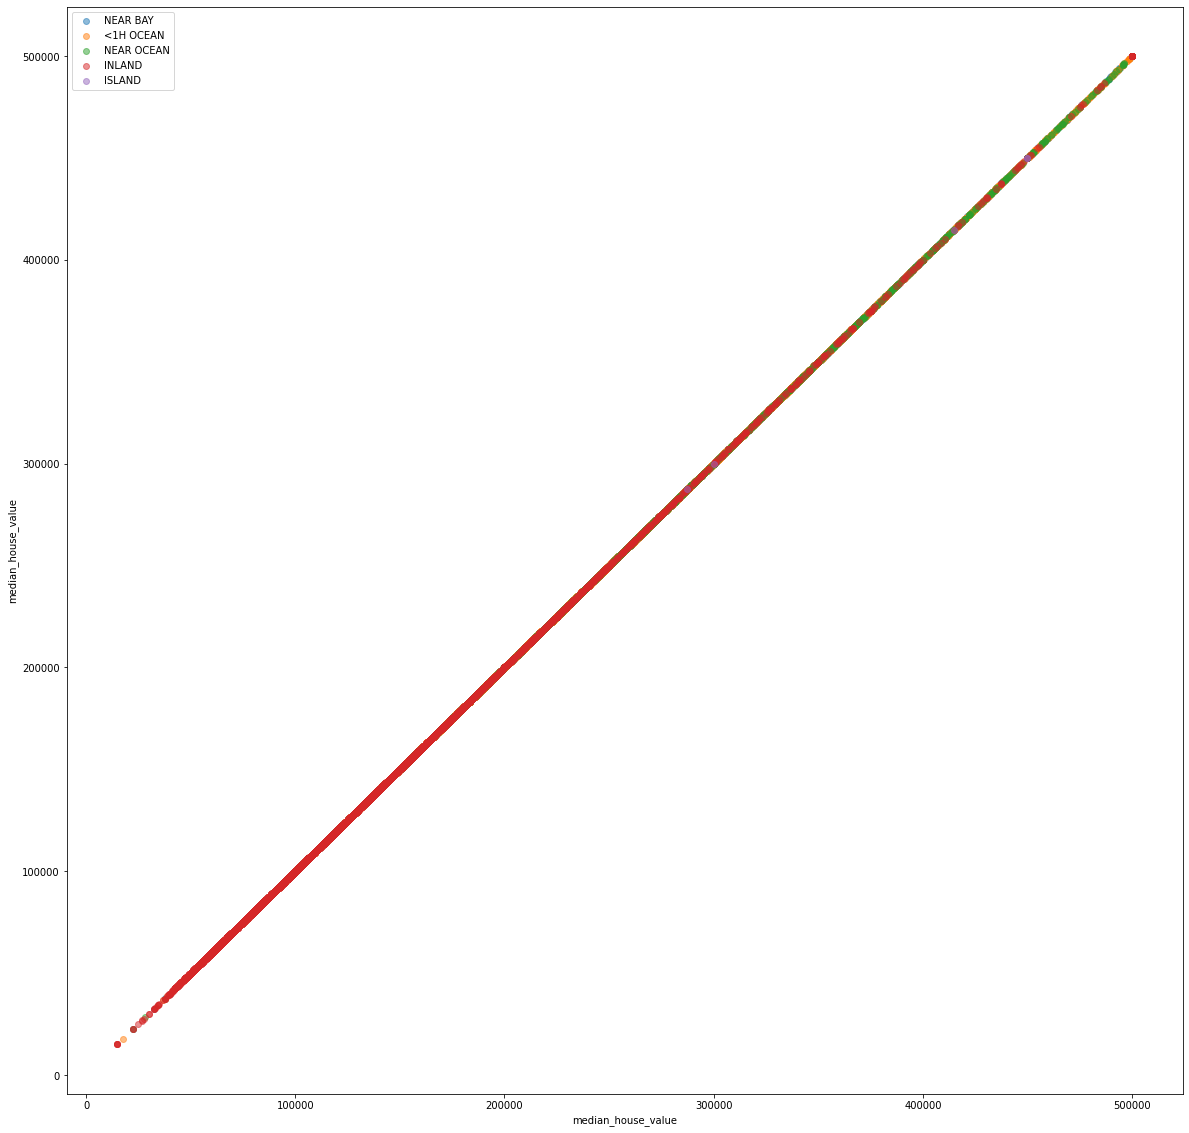

In [76]:
for col in df.select_dtypes('number'):
    plt.figure(figsize=(20,20))
    plt.scatter(x=df_nb[col], y=df_nb['median_house_value'], alpha=0.5, label='NEAR BAY')
    plt.scatter(x=df_1h[col], y=df_1h['median_house_value'], alpha=0.5, label='<1H OCEAN')
    plt.scatter(x=df_no[col], y=df_no['median_house_value'], alpha=0.5, label='NEAR OCEAN')
    plt.scatter(x=df_in[col], y=df_in['median_house_value'], alpha=0.5, label='INLAND')
    plt.scatter(x=df_il[col], y=df_il['median_house_value'], alpha=0.5, label='ISLAND')
    plt.xlabel(col)
    plt.ylabel('median_house_value')
    plt.legend()

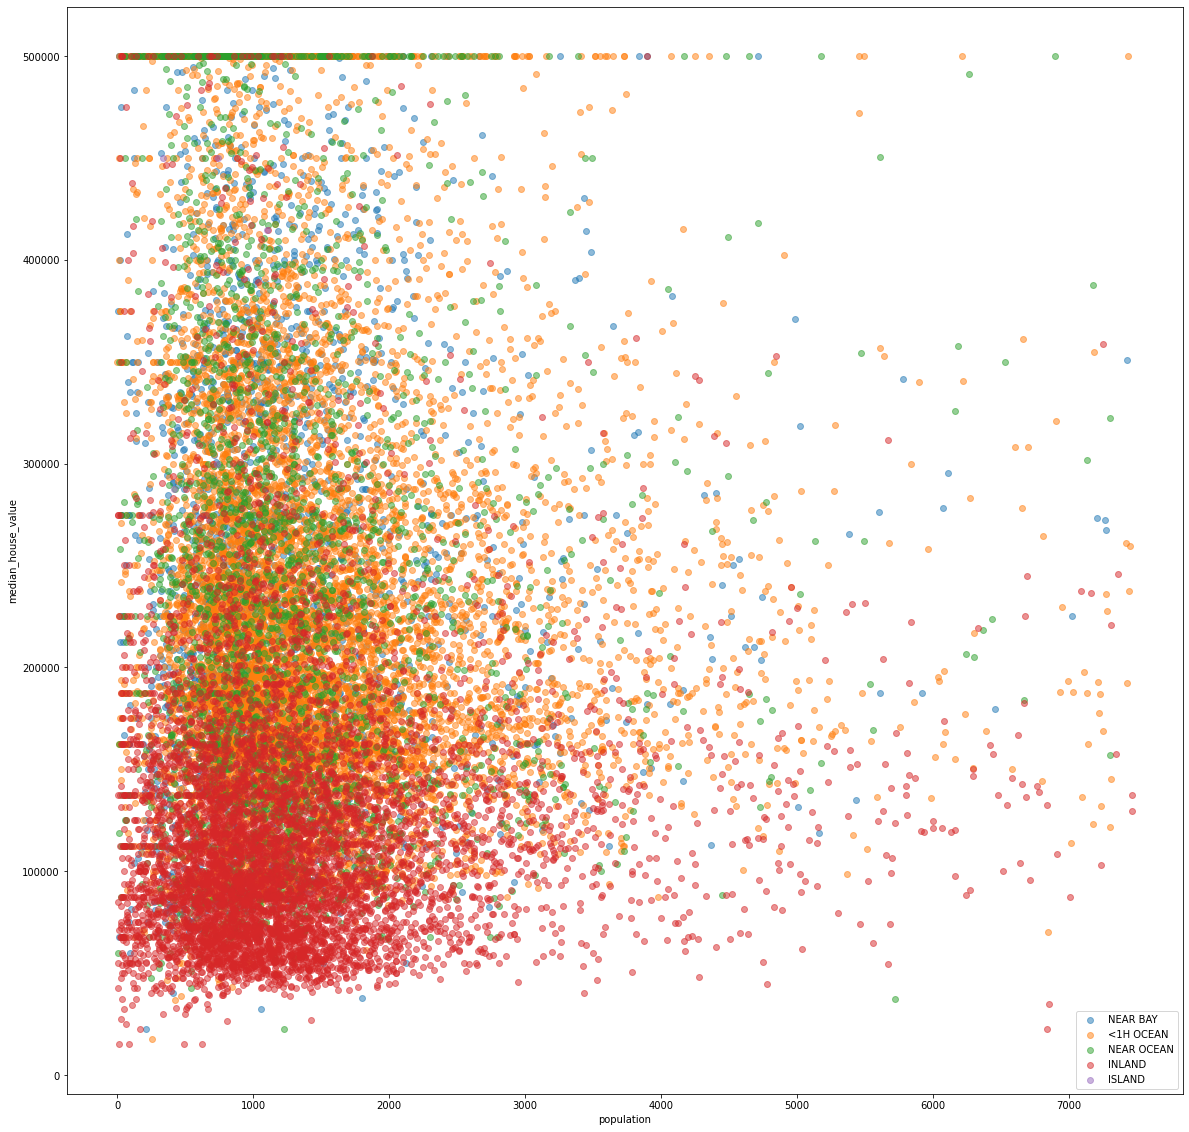

In [77]:
threshold = 7500

plt.figure(figsize=(20,20))
plt.scatter(x=df_nb[df_nb['population'] < threshold]['population'], y=df_nb[df_nb['population'] < threshold]['median_house_value'], alpha=0.5, label='NEAR BAY')
plt.scatter(x=df_1h[df_1h['population'] < threshold]['population'], y=df_1h[df_1h['population'] < threshold]['median_house_value'], alpha=0.5, label='<1H OCEAN')
plt.scatter(x=df_no[df_no['population'] < threshold]['population'], y=df_no[df_no['population'] < threshold]['median_house_value'], alpha=0.5, label='NEAR OCEAN')
plt.scatter(x=df_in[df_in['population'] < threshold]['population'], y=df_in[df_in['population'] < threshold]['median_house_value'], alpha=0.5, label='INLAND')
plt.scatter(x=df_il[df_il['population'] < threshold]['population'], y=df_il[df_il['population'] < threshold]['median_house_value'], alpha=0.5, label='ISLAND')
plt.xlabel('population')
plt.ylabel('median_house_value')
plt.legend()

In [78]:
import matplotlib.image as mpimg

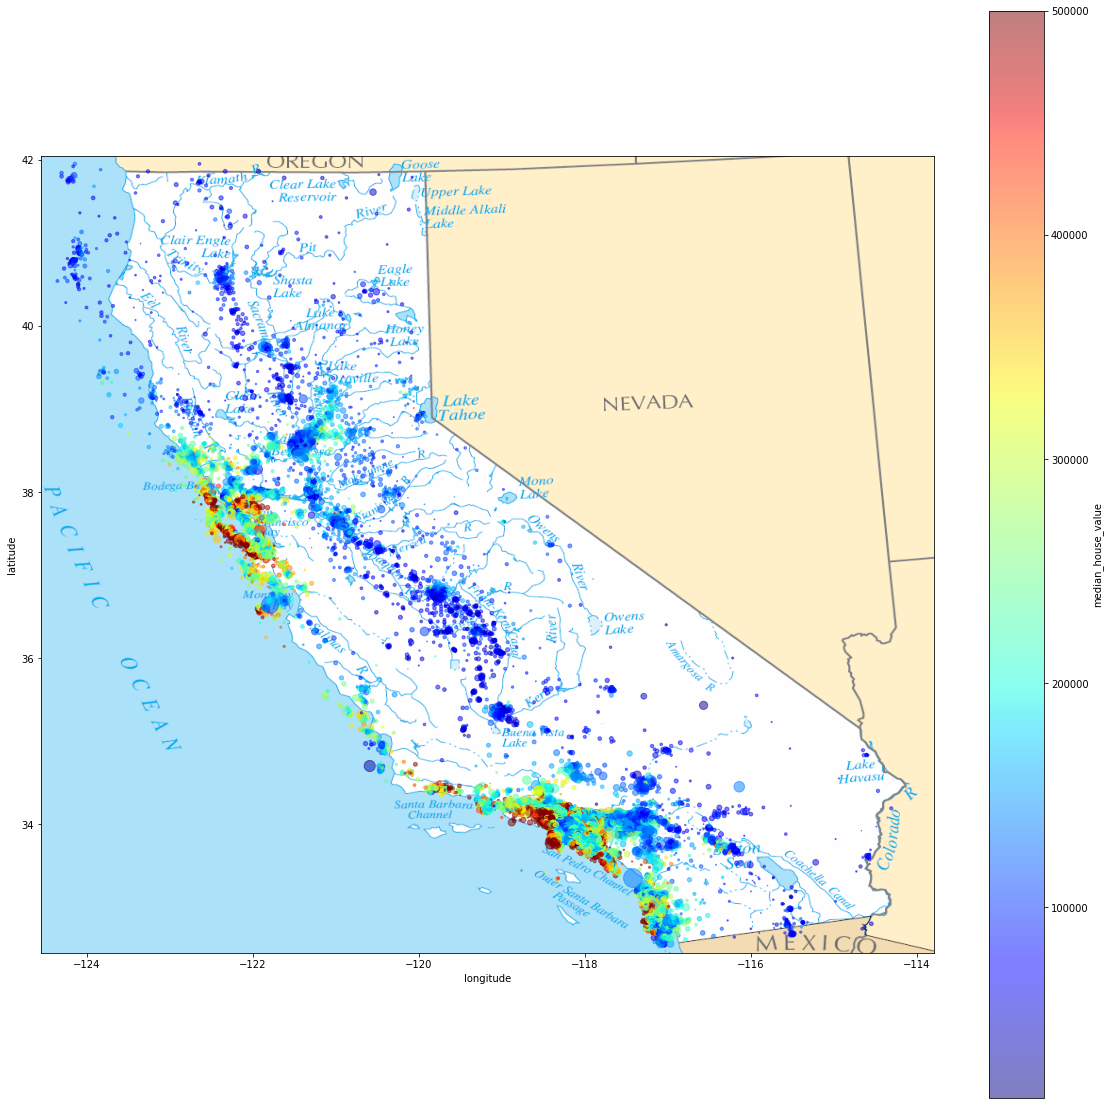

In [86]:
calImg = mpimg.imread('californie.gif')
ax = plt.gca()

df.plot(kind='scatter', x='longitude', y='latitude', figsize=(20,20),
    s=df['population'] / 100,
    alpha=0.5, c='median_house_value', cmap=plt.get_cmap('jet'), ax=ax)
ax.imshow(calImg, extent=[-124.55, -113.80, 32.45, 42.05])

In [102]:
def ocean_prox_converter(data):
    if data['ocean_proximity'] == 'NEAR BAY':
        return 0
    elif data['ocean_proximity'] == '<1H OCEAN':
        return 2
    elif data['ocean_proximity'] == 'NEAR OCEAN':
        return 1
    elif data['ocean_proximity'] == 'INLAND':
        return 3
    elif data['ocean_proximity'] == 'ISLAND':
        return 4

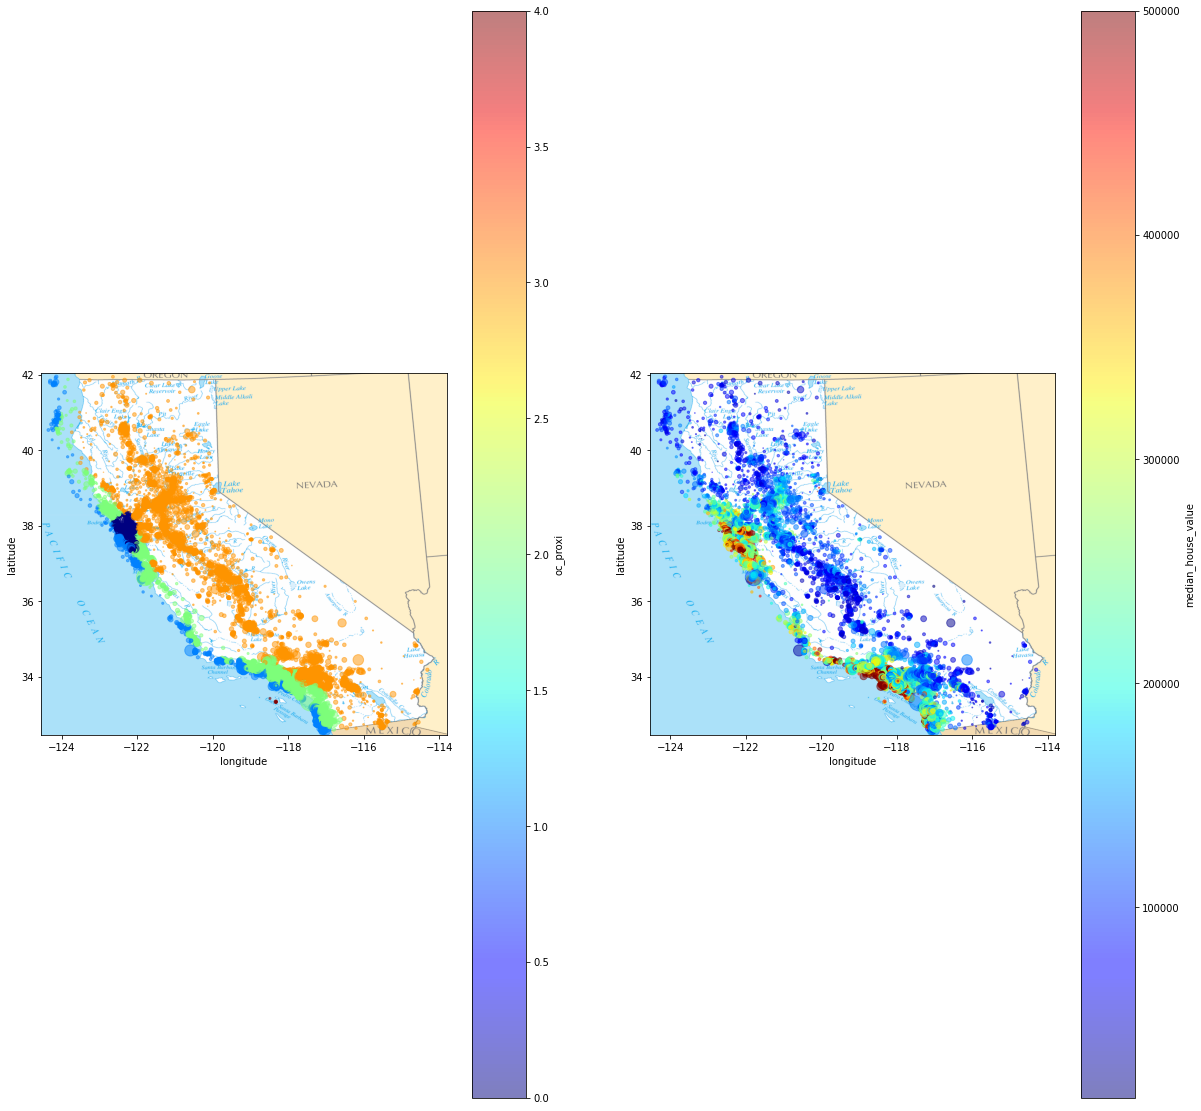

In [110]:
df['oc_proxi'] = df.apply(ocean_prox_converter, axis=1)

plt.figure(figsize=(40, 40))
plt.subplot(1, 2, 1)
ax = plt.gca()

df.plot(kind='scatter', x='longitude', y='latitude', figsize=(20,20),
    s=df['population'] / 100,
    alpha=0.5, c='oc_proxi', cmap=plt.get_cmap('jet'), ax=ax)
ax.imshow(calImg, extent=[-124.55, -113.80, 32.45, 42.05])

plt.subplot(1, 2, 2)
ax = plt.gca()

df.plot(kind='scatter', x='longitude', y='latitude', figsize=(20,20),
    s=df['population'] / 100,
    alpha=0.5, c='median_house_value', cmap=plt.get_cmap('jet'), ax=ax)
ax.imshow(calImg, extent=[-124.55, -113.80, 32.45, 42.05])

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

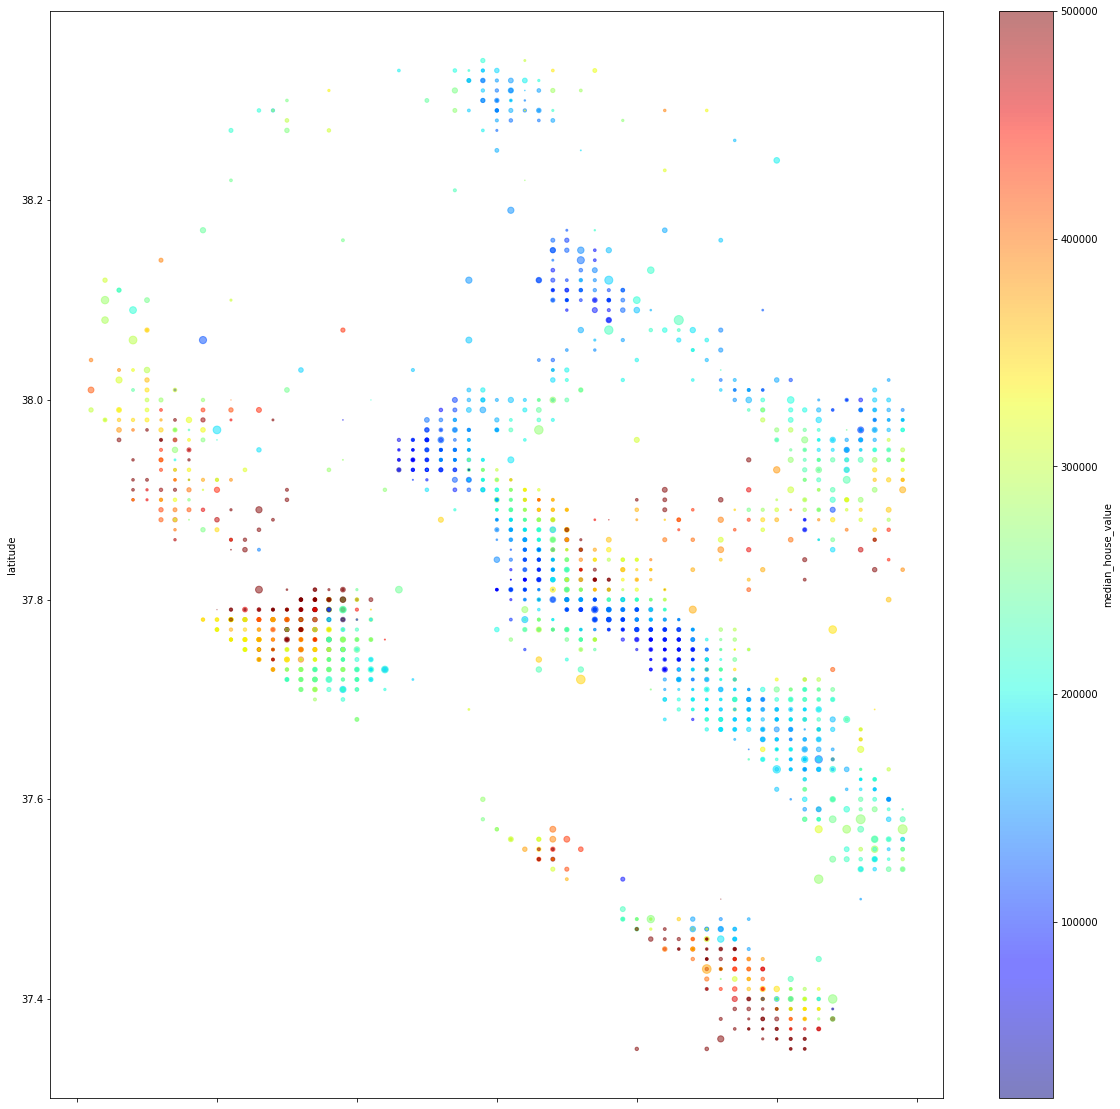

In [111]:
df_nb.plot(kind='scatter', x='longitude', y='latitude', figsize=(20,20),
    s=df_nb['population'] / 100,
    alpha=0.5, c='median_house_value', cmap=plt.get_cmap('jet'))

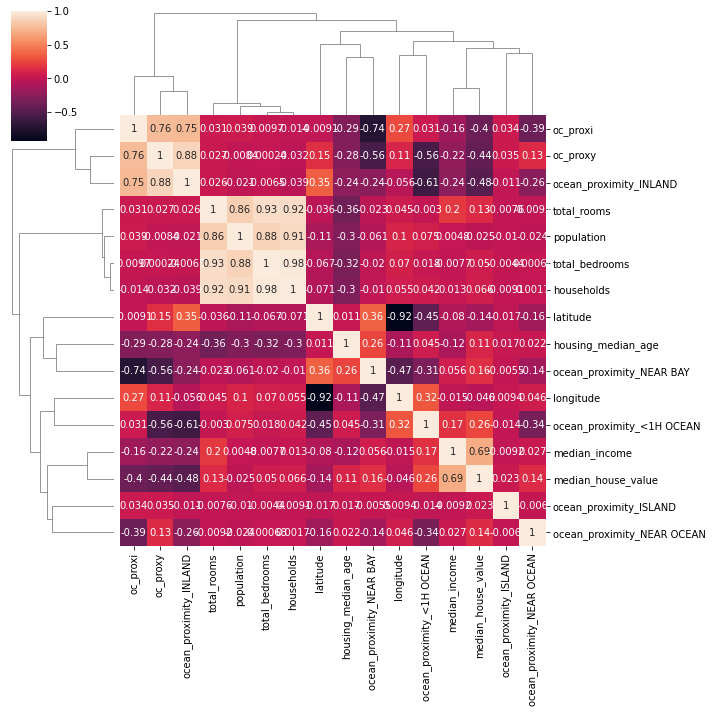

In [112]:
sns.clustermap(pd.get_dummies(df).corr(), annot=True)

In [113]:
pd.get_dummies(df).corr()['median_house_value'].sort_values(ascending=False)

median_house_value            1.000000
median_income                 0.688075
ocean_proximity_<1H OCEAN     0.256617
ocean_proximity_NEAR BAY      0.160284
ocean_proximity_NEAR OCEAN    0.141862
total_rooms                   0.134153
housing_median_age            0.105623
households                    0.065843
total_bedrooms                0.049686
ocean_proximity_ISLAND        0.023416
population                   -0.024650
longitude                    -0.045967
latitude                     -0.144160
oc_proxi                     -0.395572
oc_proxy                     -0.435062
ocean_proximity_INLAND       -0.484859
Name: median_house_value, dtype: float64

In [126]:
from scipy.stats import ttest_ind

In [127]:
def t_test(col, left, right):
    alpha = 0.02 # seuil alpha
    stat, p = ttest_ind(left[col].dropna(), right[col].dropna())

    if p < alpha:
        return 'Rejected'
    else:
        return 0

In [128]:
df_il.shape

(5, 10)

In [129]:
dnb = df_nb.sample(df_nb.shape[0])

In [130]:
dno = df_no.sample(df_nb.shape[0])

In [131]:
din = df_in.sample(df_nb.shape[0])


In [132]:
d1h = df_1h.sample(df_nb.shape[0])


In [136]:
col = 'median_house_value'

print(f'medial house value din | d1h {t_test(col, din, d1h)}')
print(f'medial house value din | dno {t_test(col, din, dno)}')
print(f'medial house value din | dnb {t_test(col, din, dnb)}')

print(f'medial house value dno | d1h {t_test(col, dno, d1h)}')
print(f'medial house value dno | din {t_test(col, dno, din)}')
print(f'medial house value dno | dnb {t_test(col, dno, dnb)}')

print(f'medial house value dnb | d1h {t_test(col, dnb, d1h)}')
print(f'medial house value dnb | din {t_test(col, dnb, din)}')
print(f'medial house value dnb | dno {t_test(col, dnb, dno)}')

medial house value din | d1h Rejected
medial house value din | dno Rejected
medial house value din | dnb Rejected
medial house value dno | d1h Rejected
medial house value dno | din Rejected
medial house value dno | dnb Rejected
medial house value dnb | d1h Rejected
medial house value dnb | din Rejected
medial house value dnb | dno Rejected
